In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
train_01 = pd.read_csv(f'titanic_train.csv')
train_v1 = train_01.copy()

In [5]:
train_v1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
train_v1.shape

(891, 12)

In [11]:
train_v1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train_v1.describe(include = ['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


<Axes: >

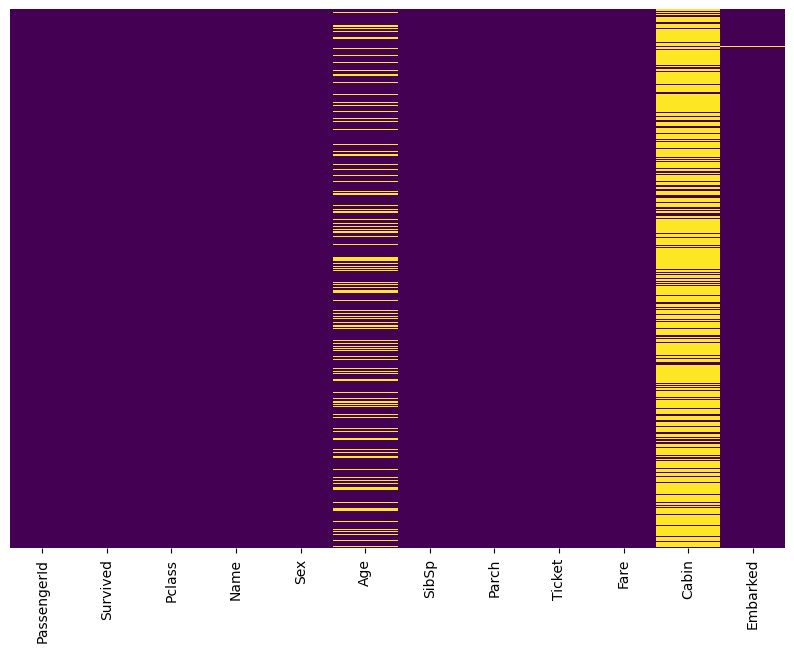

In [19]:
plt.figure(figsize = (10, 7))
sns.heatmap(
    train_v1.isnull(),
    yticklabels = False,
    cbar = False,
    cmap = 'viridis'
)

/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_14573/238898811.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_data.index,


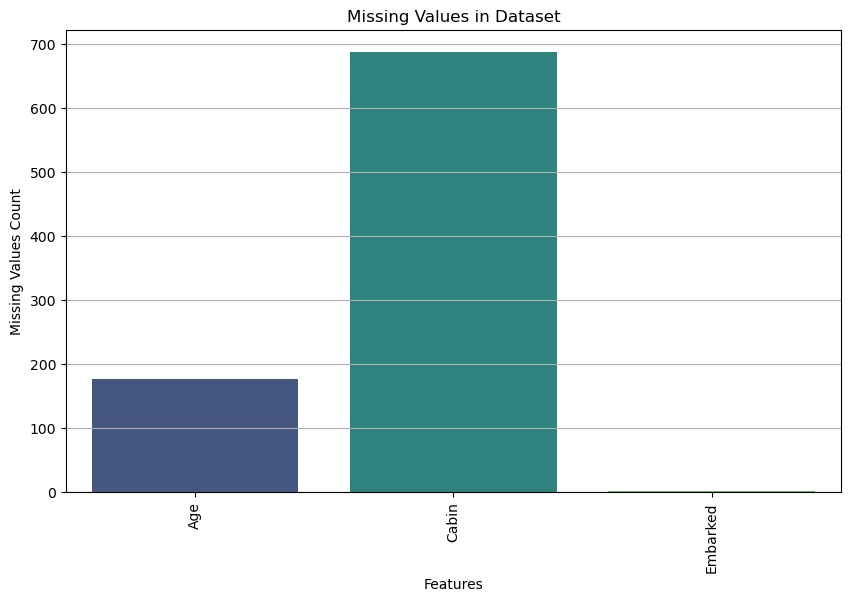

In [59]:
# Create a DataFrame with missing value counts
missing_data = pd.DataFrame(train_v1.isnull().sum(), columns=['Missing Values'])
missing_data = missing_data[missing_data['Missing Values'] > 0]  # Keep only features with missing values

# Plot the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index,
            y=missing_data['Missing Values'],
            palette = 'viridis')

# Customize plot
plt.xticks(rotation=90)
plt.grid(axis = 'y')
plt.xlabel("Features")
plt.ylabel("Missing Values Count")
plt.title("Missing Values in Dataset")
plt.show()

/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_14573/1824498739.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Axes: xlabel='Survived', ylabel='count'>

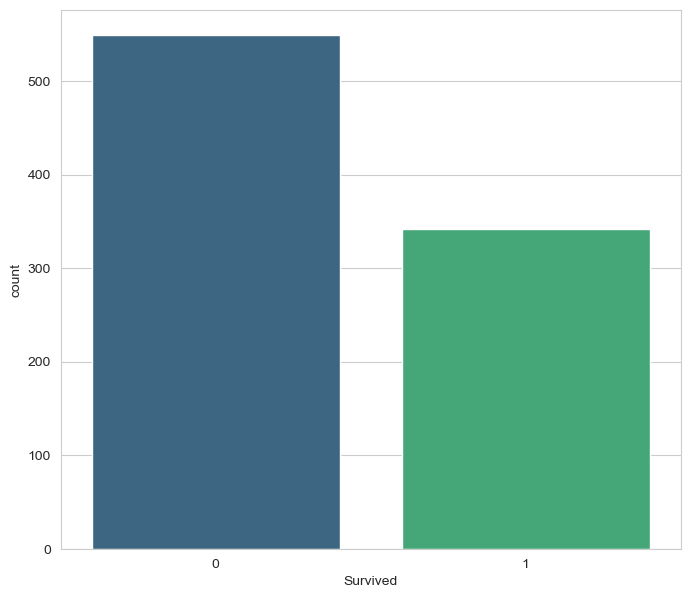

In [65]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 7))
sns.countplot(
    x = 'Survived',
    data = train_v1,
    palette = 'viridis'
)

<Axes: xlabel='Survived', ylabel='count'>

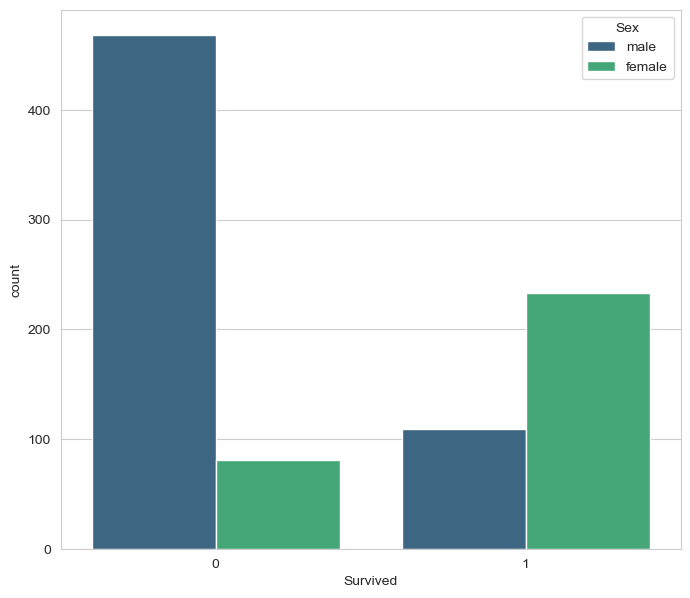

In [69]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 7))
sns.countplot(
    x = 'Survived',
    data = train_v1,
    hue = 'Sex',
    palette = 'viridis'
)

<Axes: xlabel='Survived', ylabel='count'>

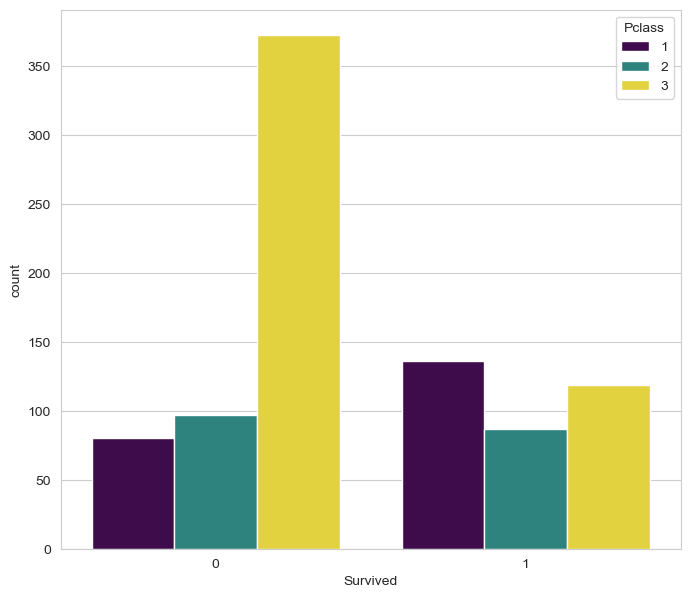

In [71]:
sns.set_style('whitegrid')
plt.figure(figsize = (8, 7))
sns.countplot(
    x = 'Survived',
    data = train_v1,
    hue = 'Pclass',
    palette = 'viridis'
)

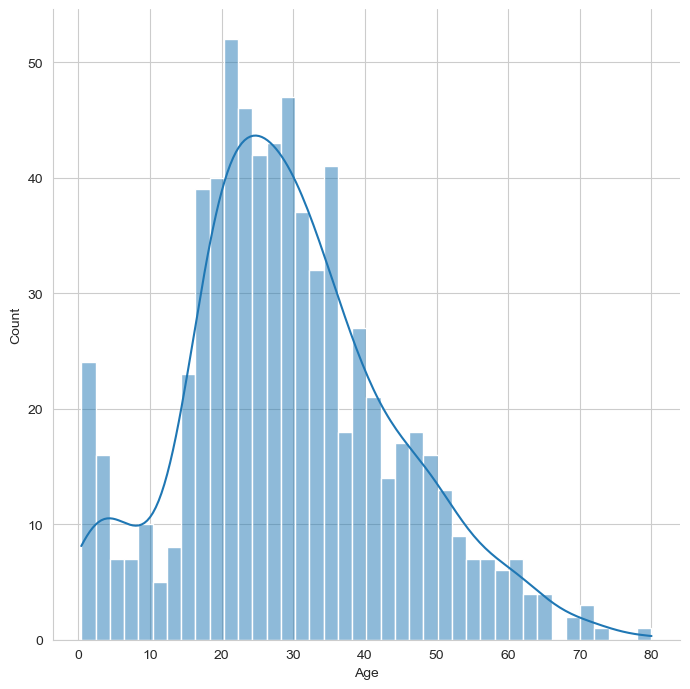

In [79]:
sns.displot(
    train_v1['Age'].dropna(), 
    kde = True,
    bins = 40,
    height = 7
)

/var/folders/ng/y3jq4z5556l47rj1150jg7jm0000gn/T/ipykernel_14573/3435998214.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


<Axes: xlabel='SibSp', ylabel='count'>

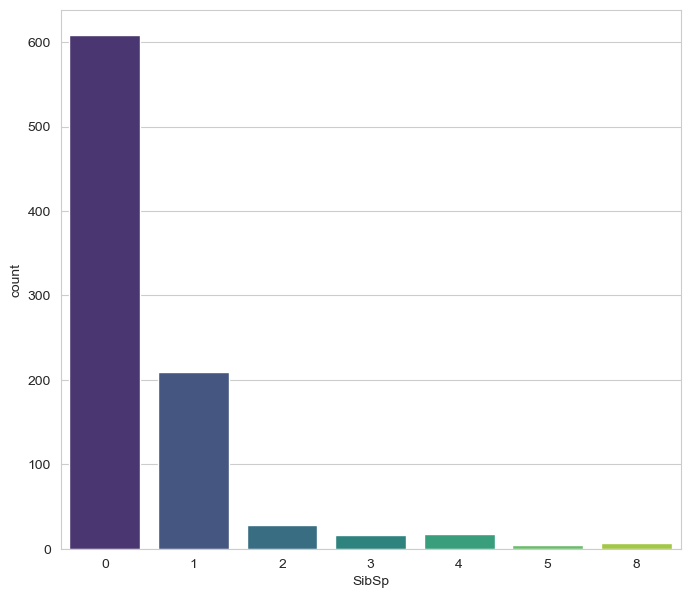

In [89]:
plt.figure(figsize = (8, 7))
sns.countplot(
    x = 'SibSp',
    data = train_v1,
    palette = 'viridis'
    
)

<Axes: ylabel='Frequency'>

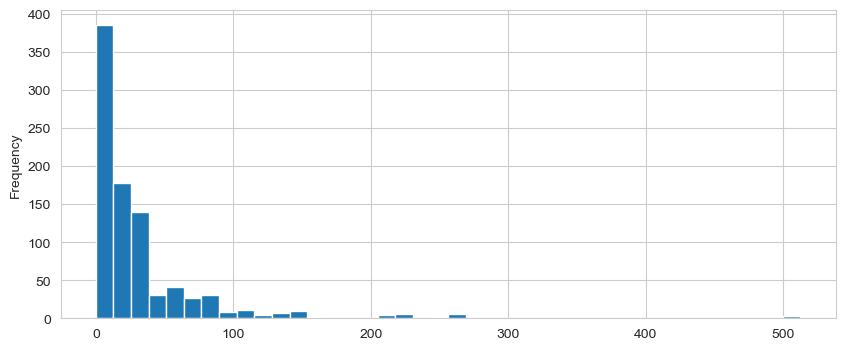

In [93]:
train_v1['Fare'].plot.hist(
    bins = 40,
    figsize = (10, 4)
)